In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import matplotlib.dates as mdates

import os

In [2]:
proc_dir = 'proc_data'

In [3]:
filenames = pd.read_csv('filenames.csv', sep='|')

for c in filenames.columns: 
    filenames[c] = filenames[c].str.strip()

filenames.columns = [c.strip() for c in filenames.columns]

filenames_dict = filenames.set_index('Filename stub').to_dict()

In [4]:
column_lang = 'Name EN'

In [5]:
data = []
for f in [f for f in os.listdir(proc_dir) if f.endswith('.csv')]:
    fn = os.path.join(proc_dir, f)
    df = pd.read_csv(fn)
    df['day'] = pd.to_datetime(df['day'])
    stub = f.split('.csv')[0]
    data_dict = {'stub': stub,
                 'name': filenames_dict[column_lang][stub], 
                 'unit': filenames_dict['Unit'][stub], 
                'data': df[['day', 'value']]}
    data.append(data_dict)

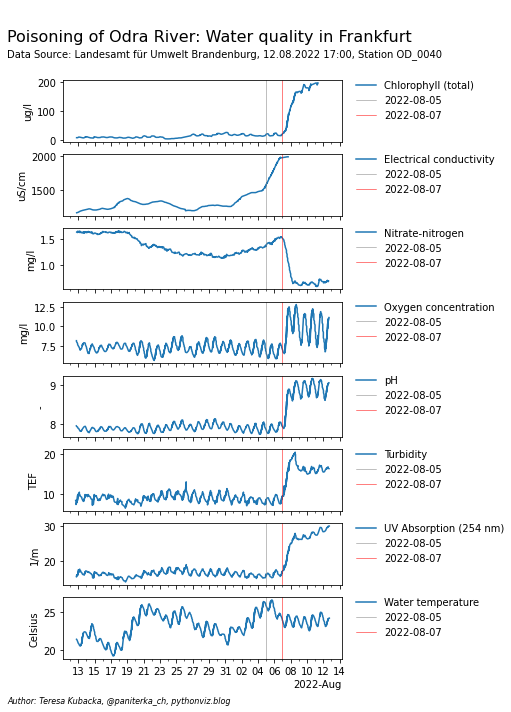

In [6]:
f, axes = plt.subplots(nrows=len(data)+1, figsize=(5,12), sharex=True)
for ax,d in zip(axes[1:],data): 
    df = d['data']
    ax.plot(df['day'], df['value'], label = d['name'])
    
    ax.set_ylabel(d['unit'])
    
    selected_days = [{'day': '2022-08-05',
                     'style': {'color': 'gray'}}, 
                    {'day': '2022-08-07',
                     'style': {'color': 'red'}}, 
                    ]
    
    for sel_day in selected_days:
        ax.axvline(pd.to_datetime(sel_day['day']), label=sel_day['day'], lw=0.5, **sel_day['style'] )
        
    ax.legend( 
          bbox_to_anchor=[1.05,1], loc='upper left', 
          edgecolor='w', facecolor='none',
          borderpad=0, borderaxespad=0)
    
    locator = mdates.DayLocator(interval=2)
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
    
left_start = -0.2

title_ax = axes[0]
title_ax.axis('off')
t = title_ax.annotate('Poisoning of Odra River: Water quality in Frankfurt',
            xy=(left_start, 0.5), xycoords='axes fraction',
            horizontalalignment='left', verticalalignment='center',
            fontsize=16, color='k')
title_ax.annotate('Data Source: Landesamt für Umwelt Brandenburg, 12.08.2022 17:00, Station OD_0040',
            xy=(0.0, -0.25), xycoords=t,
            horizontalalignment='left', verticalalignment='top',
            fontsize=10, color='k')

footnote = [
    'Author: Teresa Kubacka, @paniterka_ch, pythonviz.blog'
]
title_ax.annotate('|'.join(footnote), 
            xy = (left_start,-0.75), xycoords=axes[-1], ha='left', va='bottom',
            fontsize=8, style='italic', 
            bbox=dict(boxstyle='square,pad=0.0',fc='none', ec='none')
        )


f.savefig('water_anomalies_together.png', dpi=300, facecolor='white', bbox_inches='tight')